In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
0     7501 non-null object
1     5747 non-null object
2     4389 non-null object
3     3345 non-null object
4     2529 non-null object
5     1864 non-null object
6     1369 non-null object
7     981 non-null object
8     654 non-null object
9     395 non-null object
10    256 non-null object
11    154 non-null object
12    87 non-null object
13    47 non-null object
14    25 non-null object
15    8 non-null object
16    4 non-null object
17    4 non-null object
18    3 non-null object
19    1 non-null object
dtypes: object(20)
memory usage: 1.1+ MB


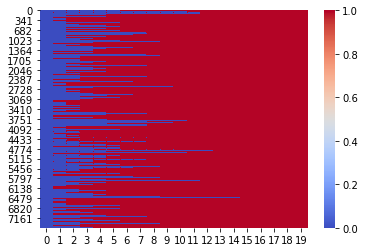

In [10]:
sns.heatmap(df.isnull(), cmap="coolwarm")

In [11]:
# Aim is to find out the relation between product

In [12]:
# support lift confidence

In [14]:
from apyori import apriori

In [28]:
# apriori takes list of list as input so converting df to list
transaction = []
for i in range(0, 7501):
    transaction.append([df.iloc[i,j] for j in range(0, 20) if str(df.iloc[i,j]) != 'nan'])
    

In [29]:
transaction

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [32]:
rules = apriori(transaction, min_support = 0.003, min_cofidence=0.2, min_lift=3, min_length =2)

In [35]:
# min support 3  item per day
21/7500

# Min confidence
#20%

# support > confidence > lift

# min length is the minimum item values

0.0028

In [37]:
rules = list(rules)

In [38]:
rules

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [39]:
# Now convert the rules in to datframe

In [40]:
result_df = pd.DataFrame(columns=['Base item', 'add item', 'confidence'])

In [41]:
result_df

,Base item,add item,confidence


In [45]:
# Now extract rules and add the values
for i in range(len(rules)):
    ib = rules[i].ordered_statistics[0].items_base
    ia = rules[i].ordered_statistics[0].items_add
    c = rules[i].ordered_statistics[0].confidence
    result_df.loc[i] = [ib,ia,c]     

In [46]:
result_df

,Base item,add item,confidence
0,(brownies),(cottage cheese),0.102767
1,(chicken),(light cream),0.075556
2,(escalope),(mushroom cream sauce),0.072269
3,(escalope),(pasta),0.073950
4,(fresh bread),(tomato juice),0.099071
5,(fresh tuna),(honey),0.179641
6,(fromage blanc),(honey),0.245098
7,(ground beef),(herb & pepper),0.162822
8,(ground beef),(tomato sauce),0.054274
9,(light cream),(olive oil),0.205128
